In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('speed_dating.csv',encoding = "ISO-8859-1")


In [3]:
df["attr3_1"].describe()

count    8273.000000
mean        7.084733
std         1.395783
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: attr3_1, dtype: float64

In [4]:
dff = df.drop(['dec'],axis = 1)

In [5]:
dff["match"]

0       0
1       0
2       1
3       1
4       1
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8348    0
8349    0
8350    0
8351    0
8352    0
8353    0
8354    0
8355    0
8356    1
8357    1
8358    0
8359    0
8360    1
8361    0
8362    1
8363    1
8364    0
8365    0
8366    0
8367    0
8368    0
8369    0
8370    0
8371    1
8372    0
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: int64

In [6]:
X = dff.drop(["match"],axis = 1)

In [7]:
y = dff["match"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:

dummy = DummyClassifier(strategy="most_frequent")
clf = tree.DecisionTreeClassifier()

In [10]:
le = LabelEncoder()

In [11]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
            ... 
amb1_3      4404
shar1_3     4404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb2_3      5419
shar2_3     6362
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    63

In [12]:
cont_attributes = df.select_dtypes(exclude=['object'])
obj_attributes = df.select_dtypes(include=['object'])

In [13]:
dff = df.copy()

In [14]:
def str_to_float(series):
    return series.apply(lambda x: str(x).replace(",", "")).astype('float64')

In [15]:
for trait in ['mn_sat', 'tuition', 'income']:
    dff[trait] = str_to_float(dff[trait])

In [16]:
cont_attributes = dff.select_dtypes(exclude=['object'])
cont_attributes2 = dff.select_dtypes(exclude=['object'])
obj_attributes = dff.select_dtypes(include=['object'])

In [17]:
list(cont_attributes.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field_cd',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'income',
 'goal',
 'date',
 'go_out',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1

In [18]:
for i in cont_attributes2.columns:
    cont_attributes2[i] = cont_attributes2[i].fillna(cont_attributes2[i].mean())
for i in cont_attributes.columns:
    cont_attributes[i] = cont_attributes[i].fillna(cont_attributes[i].mean())

/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
for i in cont_attributes.columns:
    cont_attributes[i] = cont_attributes[i].fillna(cont_attributes[i].mean())
for i in cont_attributes2.columns:
    cont_attributes2[i] = cont_attributes2[i].fillna(cont_attributes2[i].mean())

/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
test_attr = cont_attributes2.copy()


cont_attributes2["attr"].unique()

array([  6.        ,   7.        ,   5.        ,   4.        ,
         8.        ,   9.        ,   3.        ,  10.        ,
         1.        ,   6.18999511,   2.        ,   0.        ,
         6.5       ,   7.5       ,   9.5       ,   8.5       ,
         9.9       ,   3.5       ])

In [21]:
for i in cont_attributes.columns:
    if(i in  ["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1","attr4_1","sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1","attr2_1","sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1","attr7_2","sinc7_2","intel7_2","fun7_2","amb7_2","shar7_2","attr4_2","sinc4_2","intel4_2","fun4_2","amb4_2","shar4_2","attr2_2","sinc2_2","intel2_2","fun2_2","amb2_2","shar2_2","attr7_3","sinc7_3","intel7_3","fun7_3","amb7_3","shar7_3","attr1_2","sinc1_2","intel1_2","fun1_2","amb1_2","shar1_2","attr1_3","sinc1_3","intel1_3","fun1_3","amb1_3","shar1_3","attr4_3","sinc4_3","intel4_3","fun4_3","amb4_3","shar4_3","attr2_3","sinc2_3","intel2_3","fun2_3","amb2_3","shar2_3","attr1_s","sinc1_s","intel1_s","fun1_s","amb1_s","shar1_s","pf_o_att","pf_o_sin","pf_o_int","pf_o_sin","pf_o_amb","pf_o_sha","pf_o_fun"]):
        cont_attributes[i] = (cont_attributes["attr4_2"]/cont_attributes["attr4_2"].mean())*5
    if (max(cont_attributes[i])>1 and max(cont_attributes[i])< 20 and i != "race" and i != "goal" and i != "date"and i != "go_out" and i != "expnum" and  i != "career_c" and i != "field_cd") :
        cont_attributes.loc[cont_attributes[i]<4,i] = 1
        cont_attributes.loc[cont_attributes[i]>7,i] = 3
        cont_attributes.loc[cont_attributes[i]>3,i] = 2
        
        
        

/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/erdembocugoz/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [22]:
cont_attributes["attr"].unique()

array([ 2.,  3.,  1.])

In [24]:
dummy = DummyClassifier(strategy="most_frequent")
clf = tree.DecisionTreeClassifier(criterion="entropy")
oner = tree.DecisionTreeClassifier(max_depth=1)
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
mlp = MLPClassifier(verbose=0, random_state=0, nesterovs_momentum=False,
                    solver='sgd', learning_rate='invscaling', momentum=0.9, learning_rate_init=0.2, max_iter = 500)
nb = GaussianNB();
X = cont_attributes.drop(["dec","match","pid","dec_o","iid","id","round","position","positin1","wave","order","partner","idg","condtn","you_call","them_cal","date_3","numdat_3","num_in_3","pf_o_att","pf_o_sin","pf_o_int","pf_o_sin","pf_o_amb","pf_o_sha","pf_o_fun"],axis = 1)

X = StandardScaler().fit_transform(X)
pca = PCA()
principalComponents = pca.fit_transform(X)


svc= SVC()
rlf = RandomForestClassifier()
y = cont_attributes["dec"]

X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.33, random_state=42)
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [25]:
df["match"].mean()

0.16471711625686322

In [26]:
clf.fit(X_train,y_train)
ppn.fit(X_train,y_train)
mlp.fit(X_train,y_train)
#svc.fit(X_train,y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='invscaling',
       learning_rate_init=0.2, max_iter=500, momentum=0.9,
       nesterovs_momentum=False, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

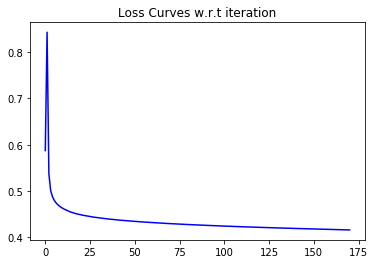

In [27]:
plt.title("Loss Curves w.r.t iteration")
plt.plot(mlp.loss_curve_, c='blue', linestyle='-')

In [28]:
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [29]:
pred = clf.predict(X_test)
pred_percep = ppn.predict(X_test)
pred_mlp = mlp.predict(X_test)
#pred_svc = svc.predict(X_test)


In [30]:
nb.fit(X_train,y_train)
rlf.fit(X_train,y_train)
oner.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
pred_rlf = rlf.predict(X_test)
pred_oner = dummy.predict(X_test)


numpy.ndarray

In [31]:
accuracy_score(y_test,pred_oner)

print("After removing features decided during the date ")

print("Dummy(ZeroR) classifier score: (%f)" % (accuracy_score(y_test,pred_oner)))
print("Single perceptron classifier score(with scaling ,without  PCA): (%a)" % (accuracy_score(y_test,pred_percep)))
print("Multi-layer perceptron classifier score(with scaling ,without PCA): (%a)" % (accuracy_score(y_test,pred_mlp)))
print("Decision tree classifier score(with scaling ,without PCA): (%a)" % (accuracy_score(y_test,pred)))
print("Random forest classifier score(with scaling ,without PCA): (%a)" % (accuracy_score(y_test,pred_rlf)))
print("Support vector machine score(with scaling ,without PCA): (%a)" % (accuracy_score(y_test,pred_svc)))
print("Naive Bayes classifier score(with scaling ,without PCA): (%a)" % (accuracy_score(y_test,pred_nb)))

After removing features decided during the date 
Dummy(ZeroR) classifier score: (0.575769)
Single perceptron classifier score(with scaling ,without  PCA): (0.61012658227848104)
Multi-layer perceptron classifier score(with scaling ,without PCA): (0.75804701627486437)
Decision tree classifier score(with scaling ,without PCA): (0.6748643761301989)
Random forest classifier score(with scaling ,without PCA): (0.70813743218806513)
Support vector machine score(with scaling ,without PCA): (0.77613019891500901)
Naive Bayes classifier score(with scaling ,without PCA): (0.72260397830018086)


Feature ranking:
1. feature [-0.8093683  -0.8093683   1.23553146 ..., -0.8093683  -0.8093683  -0.8093683 ] (0.048259)
2. feature [ 0.99664481  0.99664481  0.99664481 ..., -2.60555114 -0.80445316
  0.99664481] (0.047584)
3. feature [ 0.17931573 -1.23261643 -1.23261643 ...,  0.74408859 -1.23261643
 -1.23261643] (0.034655)
4. feature [-0.65197568 -0.65197568  1.53379954 ..., -0.65197568  1.53379954
  1.53379954] (0.028610)
5. feature [ 0.62736681  0.62736681  0.62736681 ..., -0.76423476 -0.76423476
 -0.76423476] (0.024390)
6. feature [-0.28770576 -0.28770576  1.49513364 ..., -2.07054517 -0.28770576
  1.49513364] (0.016932)
7. feature [ 1.33003244 -0.54905892  1.33003244 ..., -2.42815028 -2.42815028
 -0.54905892] (0.014363)
8. feature [ 0.  0.  0. ...,  0.  0.  0.] (0.014357)
9. feature [-0.77886729 -0.77886729 -0.77886729 ..., -0.77886729 -0.77886729
 -0.77886729] (0.014213)
10. feature [-0.96544118 -0.96544118 -0.96544118 ..., -0.96544118 -0.96544118
 -0.96544118] (0.012004)


(-1, 15)

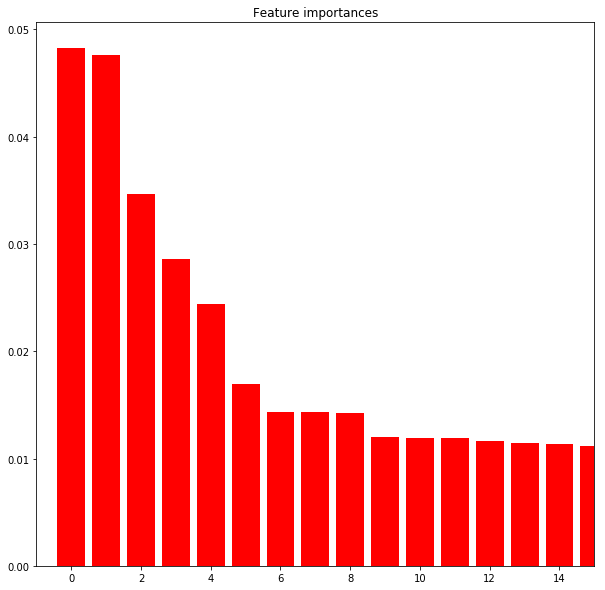

In [41]:
importances =  rlf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rlf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]) :
    if f<10:
        print("%d. feature %s (%f)" % (f + 1, X[:,indices[f]], importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure(figsize=(10, 10) )
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X.shape[1]), X[:,indices])
plt.xlim([-1, X.shape[1]-150])



In [48]:
from sklearn.metrics import average_precision_score
y_score = rlf.predict(X)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

TypeError: Singleton array 0.70813743218806513 cannot be considered a valid collection.

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X, y, cv=10)
print("10-fol cross val for MLP with PCA and with scaling")
print(scores)

10-fol cross val for MLP with PCA and with scaling
[ 0.71121718  0.75298329  0.71957041  0.76252983  0.73747017  0.74105012
  0.7398568   0.73150358  0.72281959  0.72281959]


In [44]:
oner.fit(X_train,y_train)
with open("treee.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f) 

In [ ]:
X_train.columns[15]


In [ ]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris2.pdf")

In [ ]:
basic = df[["attr","intel","fun","sinc","shar","dec"]]

In [ ]:
for i in basic.columns:
    basic[i] = basic[i].fillna(basic[i].mean())

In [ ]:
X = basic.drop(["dec"],axis = 1)
y = basic["dec"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
dummy.fit(X_train,y_train)

In [ ]:
dummyp = dummy.predict(X_test)

In [ ]:
accuracy_score(y_test,dummyp)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
treep = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,treep)